In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

C:\Users\mromo\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Paso 1: Inspeccionamos el Dataset, para estudiar la mejor forma de cargarlo

In [2]:
with open('../Data/dataset_SCL.csv') as file:
    n_rows = len(file.readlines())
print (f'Numero de Filas: {n_rows}')

Numero de Filas: 68207


* Con 68 mil filas el dataset facilmente cabe directamente en memoria y no requiere de procesamiento adicional
* Se carga estandarizando las columnas con valores mixtos y fechas

In [3]:
data_vuelos = pd.read_csv('../Data/dataset_SCL.csv', dtype= {'Vlo-I':str, 'Vlo-O':str}, parse_dates=['Fecha-I', 'Fecha-O'])
matriz_vuelos = data_vuelos.copy()

In [4]:
matriz_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [5]:
for col in matriz_vuelos:
    print(f'Columna: {col}, Valores Unicos:{len(matriz_vuelos[col].unique())}')

Columna: Fecha-I, Valores Unicos:53252
Columna: Vlo-I, Valores Unicos:584
Columna: Ori-I, Valores Unicos:1
Columna: Des-I, Valores Unicos:64
Columna: Emp-I, Valores Unicos:30
Columna: Fecha-O, Valores Unicos:62774
Columna: Vlo-O, Valores Unicos:862
Columna: Ori-O, Valores Unicos:1
Columna: Des-O, Valores Unicos:63
Columna: Emp-O, Valores Unicos:32
Columna: DIA, Valores Unicos:31
Columna: MES, Valores Unicos:12
Columna: AÑO, Valores Unicos:2
Columna: DIANOM, Valores Unicos:7
Columna: TIPOVUELO, Valores Unicos:2
Columna: OPERA, Valores Unicos:23
Columna: SIGLAORI, Valores Unicos:1
Columna: SIGLADES, Valores Unicos:62


In [6]:
matriz_vuelos.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


* Como toda la data es de tipo objeto (categorica), es realmente dificil realizar un analisis a priori a menos que se generen features que entreguen mas informacion al respecto de la pregunta de negocio en cuestion (atrasos), solo se pueden ver histogramas, rangos, aerolineas, y destinos (Origen es unico) 
* Las columnas de fecha estan con marca de tiempo por lo que es probable que existan muchos valores unicos

### Paso 2 : Analisis de distribucion simple

In [7]:
def simple_histogram(data:pd.DataFrame, column:str, enlarge:bool=False):
    if enlarge:
        plt.figure(figsize=(20,5))
    data[column].value_counts().plot.bar()

#### Aerolineas

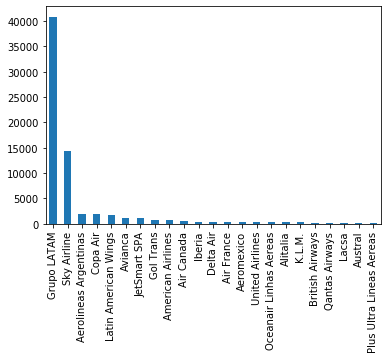

In [8]:
simple_histogram(matriz_vuelos, 'OPERA')

* Existen 2 Aerolineas sobrereprenentadas en el dataset; LATAM y Sky. Esto implica que el nombre del operador sera una feature complicada en analisis, por lo que se recomienda estratificarla o no usarla.

#### Destinos

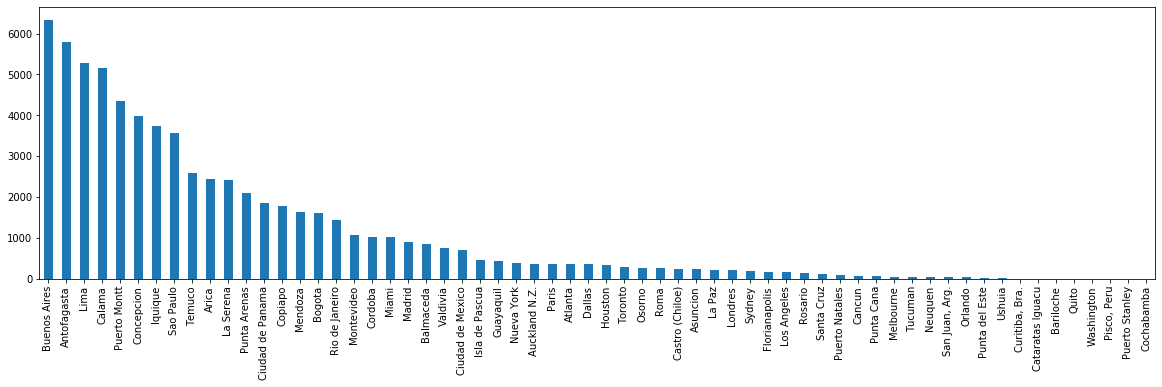

In [9]:
simple_histogram(matriz_vuelos, 'SIGLADES', enlarge=True)

* En caso de los destinos la data se encuentra un poco mejor distribuida, sin embargo, se descartaran aquellos destinos que tengan menos de 30 viajes por razones practicas y estadisticas.

* En general, la data no entrega muy buenas caracteristicas de aprendizaje para ser candidata a un modelo de ML, pudiera ser mas practico utilizar un modelo basado en reglas de negocio, o bien mejorar la calidad de la misma

#### Dias

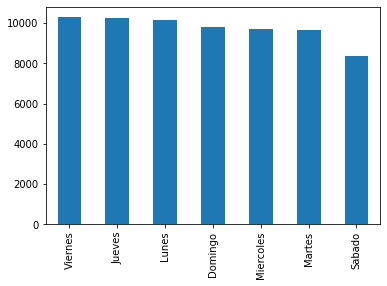

In [10]:
simple_histogram(matriz_vuelos, 'DIANOM')

* En general, la distribucion de vuelos por dia esta bastante normal, por lo que no se extraen mayores conclusiones

#### Tipos de Vuelo

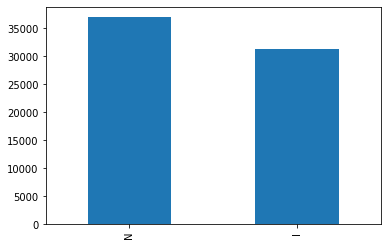

In [11]:
simple_histogram(matriz_vuelos, 'TIPOVUELO')

* Lo mismo con los tipos de vuelo. 

#### Mes

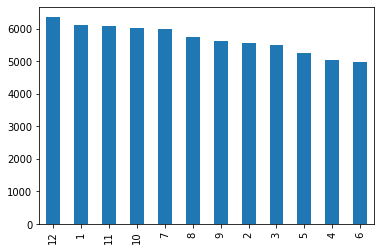

In [12]:
simple_histogram(matriz_vuelos, 'MES')

### Paso 3: Creacion de Features Adicionales

#### Temporada

In [13]:
t_alta1 = pd.date_range(start='01/01/2017', end='3/03/2017') 
t_alta2 = pd.date_range(start='07/15/2017', end='07/31/2017') 
t_alta3 = pd.date_range(start='9/11/2017', end='09/30/2017')
t_alta4 = pd.date_range(start='12/15/2017', end='01/01/2018')
t_alta = t_alta1.append([t_alta2, t_alta3, t_alta4])

In [14]:
matriz_vuelos['temporada_alta'] = pd.to_datetime(matriz_vuelos['Fecha-I']).apply(lambda x: 1 if x.strftime('%m/%d/%Y') in t_alta else 0)

#### Diferencia horaria en minutos

In [15]:
matriz_vuelos['dif_min']=matriz_vuelos['Fecha-O']-matriz_vuelos['Fecha-I']

#### Marcador de atraso 15 minutos

In [16]:
matriz_vuelos['atraso_15'] = matriz_vuelos['dif_min'].apply(lambda x: 1 if x>dt.timedelta(minutes=15) else 0)

#### Marcador Periodo del Dia

In [17]:
def periodo_dia(hora:int)->str:
    if(5<hora<12):
        return 'mañana'
    elif(12<hora<19):
        return 'tarde'
    elif(hora>19 or hora<5):
        return 'noche'

In [18]:
matriz_vuelos['periodo_dia']= matriz_vuelos['Fecha-I'].apply(lambda x: periodo_dia(x.hour))

In [19]:
matriz_vuelos.to_csv('../Data/synthetic_features.csv')

#### Analisis Resumido en Grafico Interactivo

In [20]:
meses = {index: month for index, month in enumerate(calendar.month_abbr) if month}
matriz_vuelos['TotalAerolinea'] = matriz_vuelos.groupby('OPERA')['Fecha-I'].transform(np.count_nonzero)
matriz_vuelos['Grupo'] = matriz_vuelos.apply(lambda x: x.OPERA if x.TotalAerolinea > 2500 else 'Otros', axis = 1)
matriz_vuelos

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,TotalAerolinea,Grupo
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,0 days 00:03:00,0,noche,757,Otros
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,0 days 00:09:00,0,noche,757,Otros
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,0 days 00:09:00,0,noche,757,Otros
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,0 days 00:03:00,0,noche,757,Otros
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,1,-1 days +23:58:00,0,noche,757,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1,0 days 00:46:00,1,tarde,1095,Otros
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1,0 days 00:16:00,1,tarde,1095,Otros
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1,0 days 00:40:00,1,tarde,1095,Otros
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,I,JetSmart SPA,Santiago,Lima,1,0 days 00:13:00,0,tarde,1095,Otros


In [21]:
matriz_vuelos['MESNOM'] = matriz_vuelos['MES'].apply(lambda x: meses[x])
fig = px.sunburst(matriz_vuelos, path=['Grupo','MESNOM', 'DIANOM', 'TIPOVUELO'], values='atraso_15')
fig.update_layout(
    grid= dict(columns=1, rows=1),
    margin = dict(t=0, l=0, r=0, b=0)
)
fig.show()

* Del grafico es sencillo desprender que la mayor cantidad de atrasos para LATAM ocurre en Vuelos Nacionales Durante el Mes de Julio, Principalmente en Lunes y Martes
* En el caso de Sky, en Diciembre, para vuelos Nacionales, principalmente en Lunes, Jueves y Viernes.
* Para otras aerolineas, el patron es relativamente estandar, considerando que principalmente manejan vuelos internacionales. 

### Paso 4: Analisis de Correlacion y Agrupaciones

In [22]:
def create_tardiness_metric(data:pd.DataFrame, metric:str, column_name:str='TasaAtrasos%')-> pd.DataFrame:
    if not column_name:
        column_name = 'TasaAtrasos{}%'.format(metric)
    data['TotalFlights'] = data.groupby([metric])['Fecha-I'].transform(np.count_nonzero)
    data['NumberOfLateArrivals'] = data.groupby([metric]).atraso_15.transform(np.count_nonzero)
    data[column_name] = np.round(data['NumberOfLateArrivals']/data['TotalFlights']*100,2)
    data.drop(columns = ['TotalFlights','NumberOfLateArrivals'], inplace=True)
    return data

#### Tasa de Atraso por Destino

In [23]:
matriz_vuelos = create_tardiness_metric(matriz_vuelos, 'SIGLADES', column_name='TasaAtrasosDestino%')

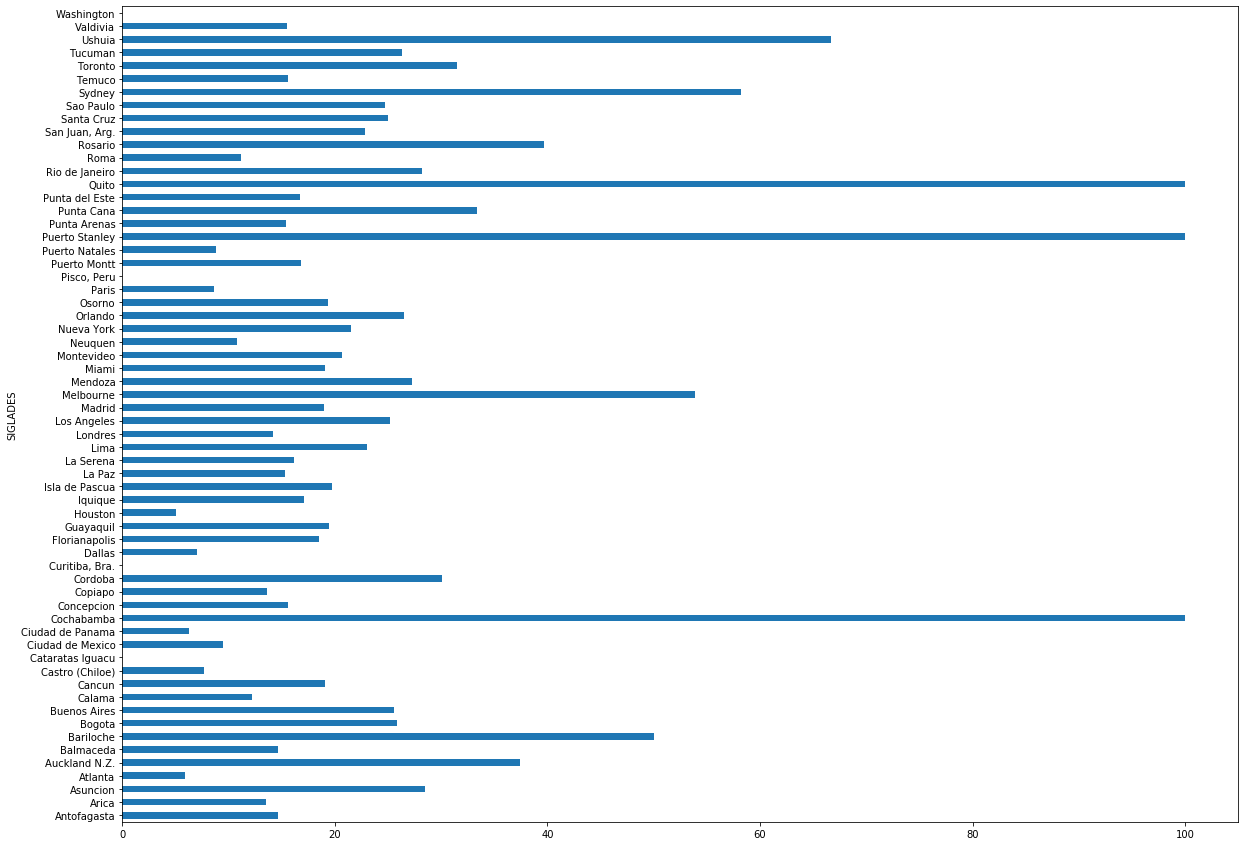

In [24]:
plt.figure(figsize = (20,15))
matriz_vuelos.groupby('SIGLADES')['TasaAtrasosDestino%'].max().plot.barh()

#### Tasa de Atrasos por Aerolinea

In [25]:
matriz_vuelos = create_tardiness_metric(matriz_vuelos, 'OPERA', column_name='TasaAtrasosAerolinea%')

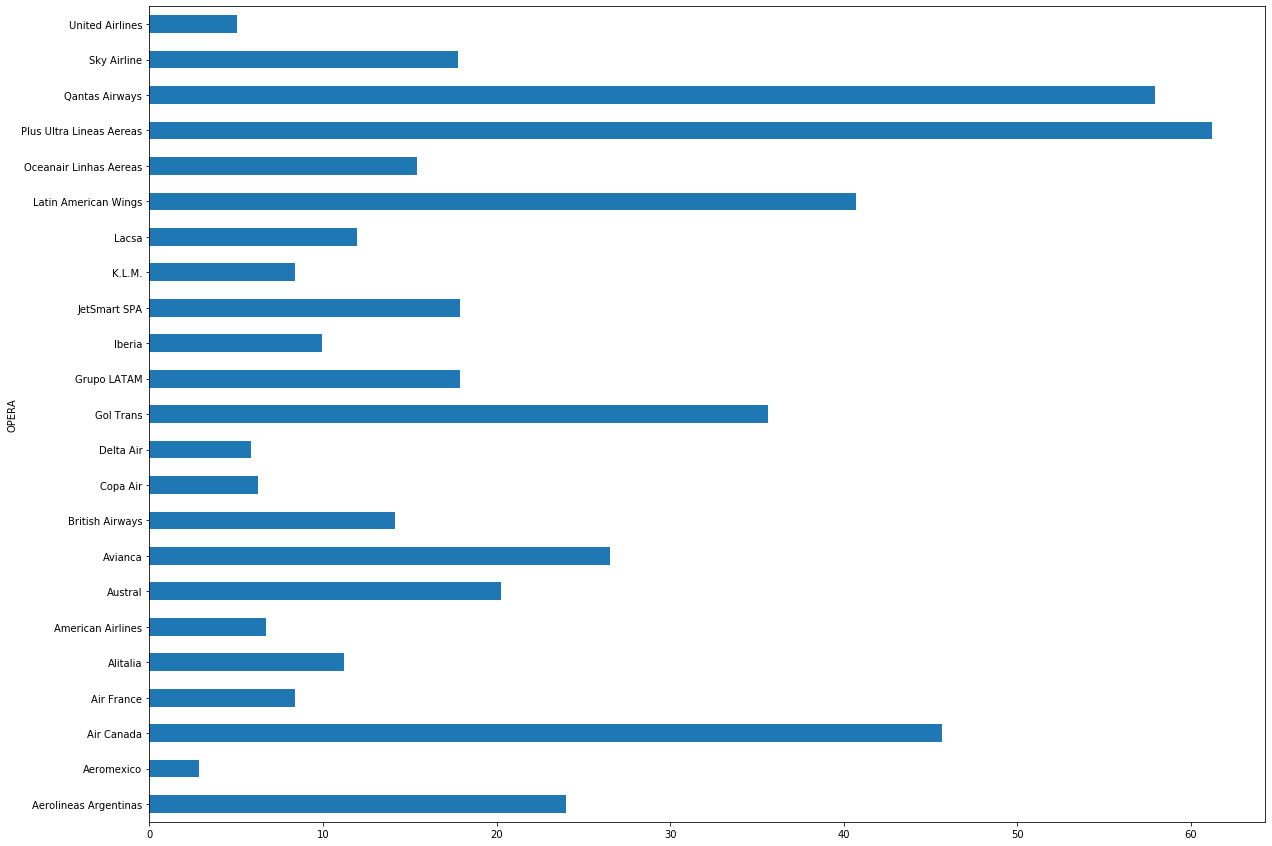

In [26]:
plt.figure(figsize = (20,15))
matriz_vuelos.groupby('OPERA')['TasaAtrasosAerolinea%'].max().plot.barh()

#### Tasa Atrasos Mes

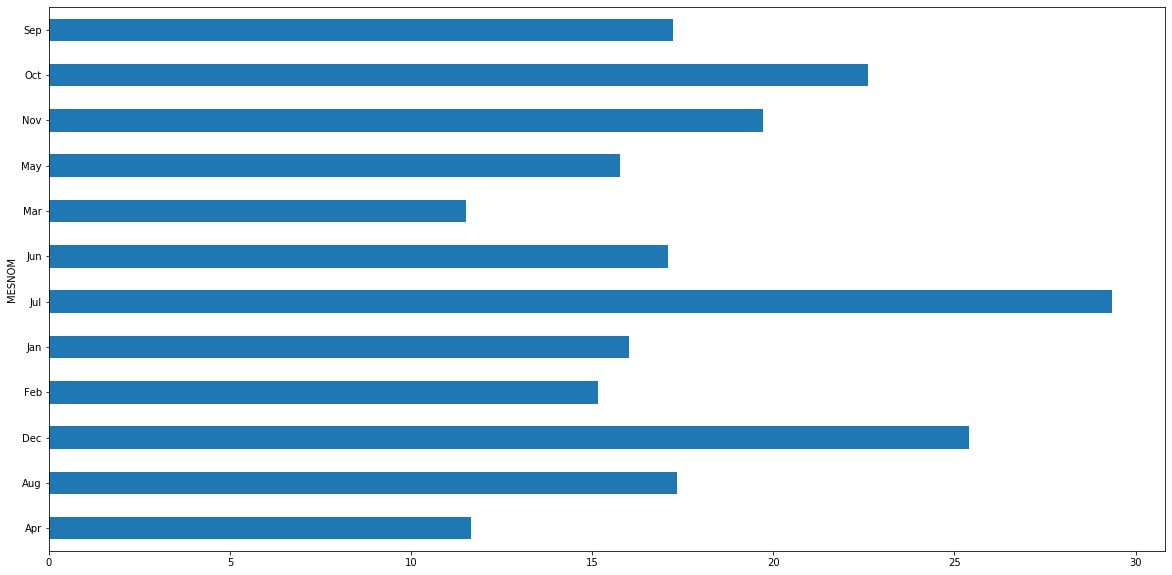

In [27]:
matriz_vuelos = create_tardiness_metric(matriz_vuelos, 'MESNOM', column_name='TasaAtrasosMes%')
plt.figure(figsize = (20,10))
matriz_vuelos.groupby('MESNOM')['TasaAtrasosMes%'].max().plot.barh()

#### Tasa Atrasos DiaSemana

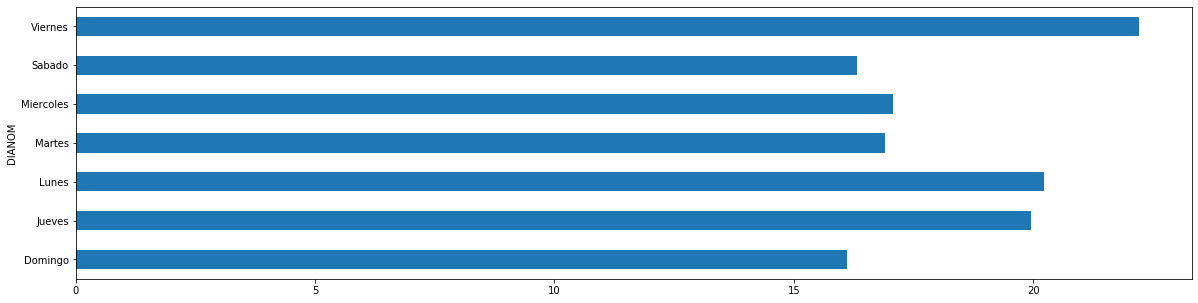

In [28]:
matriz_vuelos = create_tardiness_metric(matriz_vuelos, 'DIANOM', column_name='TasaAtrasosDia%')
plt.figure(figsize = (20,5))
matriz_vuelos.groupby('DIANOM')['TasaAtrasosDia%'].max().plot.barh()

#### Tasa Atrasos Temporada

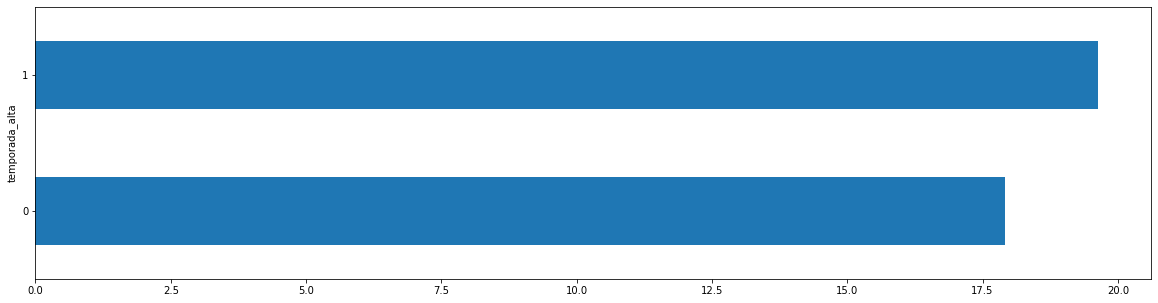

In [29]:
matriz_vuelos = create_tardiness_metric(matriz_vuelos, 'temporada_alta', column_name='TasaAtrasosTemporada%')
plt.figure(figsize = (20,5))
matriz_vuelos.groupby('temporada_alta')['TasaAtrasosTemporada%'].max().plot.barh()

#### Tasa Atrasos TipoVuelo

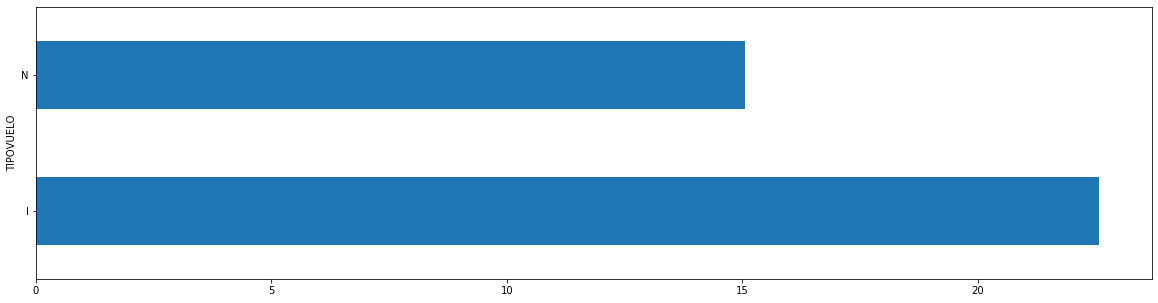

In [30]:
matriz_vuelos = create_tardiness_metric(matriz_vuelos, 'TIPOVUELO', column_name='TasaAtrasosTipoVuelo%')
plt.figure(figsize = (20,5))
matriz_vuelos.groupby('TIPOVUELO')['TasaAtrasosTipoVuelo%'].max().plot.barh()

#### Analisis de Correlacion

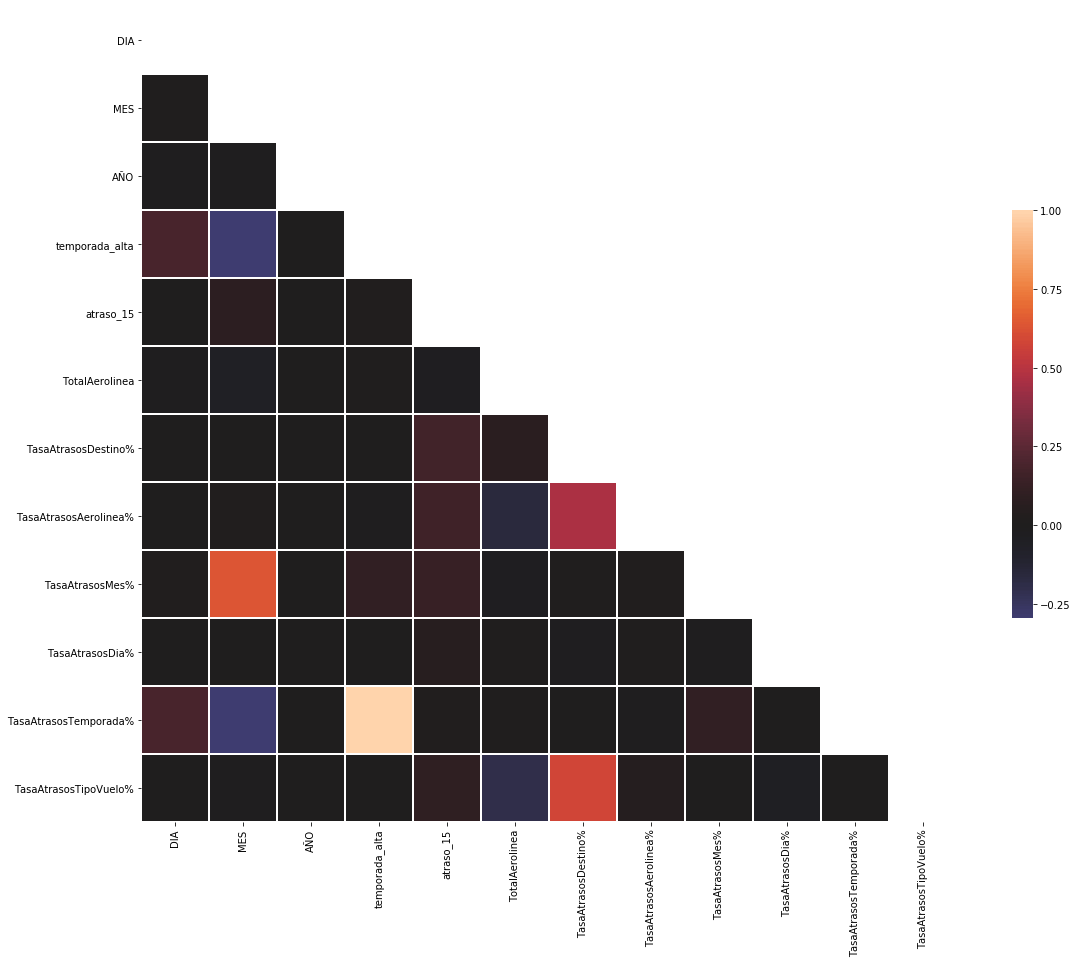

In [31]:
corr = matriz_vuelos.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* Del siguiente grafico se interpreta que las tasas de atraso son un mejor indicador para prediccion que las variables existentes

### Paso 5 Modelado base

In [32]:
%pip install sklearn_pandas --user

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [34]:
Dummy_Clf = DummyClassifier(strategy = 'stratified')
LR = LogisticRegression(n_jobs=-1)
RF = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
XGB = XGBClassifier(n_estimators = 100, n_jobs = -1)

In [35]:
params = {
    'columns': ['DIANOM', 'MESNOM', 'temporada_alta','TasaAtrasosDestino%', 'TasaAtrasosAerolinea%', 'TasaAtrasosMes%', 'TasaAtrasosDia%', 'TasaAtrasosTemporada%', 'TasaAtrasosTipoVuelo%','OPERA', 'SIGLADES'],
    'target': 'atraso_15',
    'models': [Dummy_Clf, LR, RF, XGB],
}


#### Dummyfication

In [36]:
X = pd.get_dummies(matriz_vuelos[params['columns']])
y = matriz_vuelos[params['target']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 66)

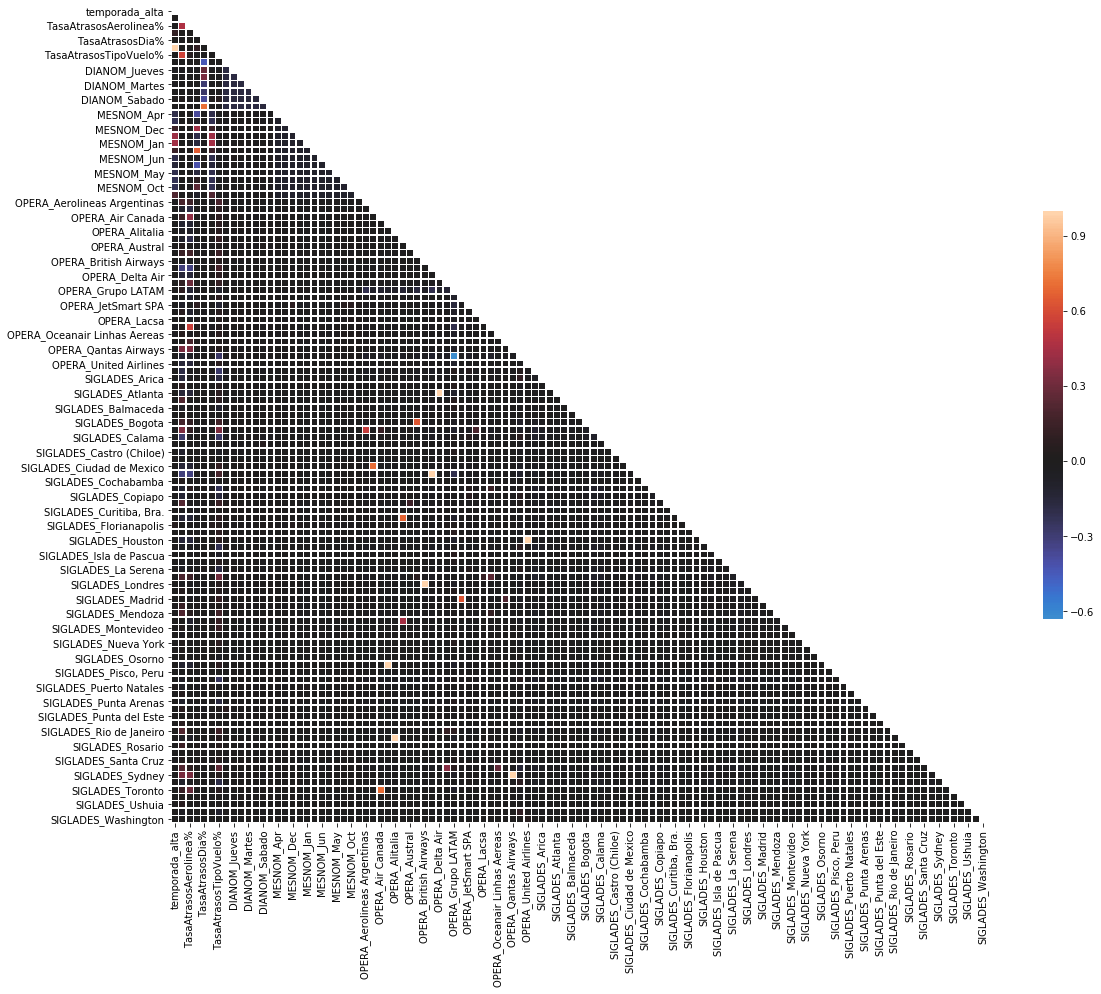

In [37]:
corr = X.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* Se usa como metrica de evaluacion el f1 macro-weighted por ser un problema de clasificacion desbalanceado. 

In [38]:
for model in params['models']:
    pipeline = Pipeline([('Model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Cross Validation Score: {0}".format(type(model).__name__))
    print(cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro'))
    print(
        "Macro-averaged F1 score on test set: %0.3f"
        % f1_score(y_test, y_pred, average="macro")
    )

Cross Validation Score: DummyClassifier
[0.50029472 0.50209788 0.50309454 0.49939381 0.50872856]
Macro-averaged F1 score on test set: 0.501
Cross Validation Score: LogisticRegression
[0.4551124  0.45500308 0.29492239 0.46002375 0.44448728]
Macro-averaged F1 score on test set: 0.482
Cross Validation Score: RandomForestClassifier
[0.47408779 0.26131746 0.23610157 0.2902551  0.37512582]
Macro-averaged F1 score on test set: 0.542
Cross Validation Score: XGBClassifier
[0.4514183  0.27941477 0.29331757 0.30785011 0.41471369]
Macro-averaged F1 score on test set: 0.495


### Conclusion

* Fue posible encontrar mas de un modelo que entrega sobre un 50% de clasificaciones correctas. 
* Es muy probable que este problema se trate de un problema tipo "fooled by randomness".
* Se puede profundizar el caso de negocio para entender asimetria de errores (Tipo I vs Tipo II) y calibrar el F_beta score adecuadamente. 
* Al generar features que entregan conocimiento al modelo, es posible mejorar la recomendacion. 